### Análise dos dados climáticos

Dados retirados de: https://bdmep.inmet.gov.br/

Ao extrair os dados recebemos 602 arquivos csv, aos quais devemos analisar.

Para analisar deveremos agregar todos esses dados em um único dataframe e realizar as devidas análises em cima.[link text](https://)


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import pandas as pd

folder_path = '/content/drive/MyDrive/DadosMetereologicosEstacoes'
file_names = os.listdir(folder_path)\

#
LIST_OF_FILE_PATHS_ESTACOES = [os.path.join(folder_path, file_name) for file_name in file_names]

LIST_OF_FILE_PATHS_ESTACOES[:5]

['/content/drive/MyDrive/DadosMetereologicosEstacoes/dados_A108_M_2015-05-13_2023-10-11.csv',
 '/content/drive/MyDrive/DadosMetereologicosEstacoes/dados_A138_M_2009-09-23_2023-10-11.csv',
 '/content/drive/MyDrive/DadosMetereologicosEstacoes/dados_A140_M_2009-09-24_2023-10-11.csv',
 '/content/drive/MyDrive/DadosMetereologicosEstacoes/dados_A137_M_2009-10-26_2023-10-11.csv',
 '/content/drive/MyDrive/DadosMetereologicosEstacoes/dados_A136_M_2009-10-28_2023-10-11.csv']

In [3]:
dataframes = []

# Function to clean and convert each cell in a line
def clean_cell(cell):
    try:
        return float(cell.replace(',', '.'))
    except:
        return cell

# Function to read, split and clean each line from the tabular part of the file
def read_and_clean_lines(lines, start_line):
    cleaned_data = []
    for line in lines[start_line:]:
        cleaned_line = [clean_cell(cell) for cell in line.split(';')]
        cleaned_data.append(cleaned_line)
    return cleaned_data

for i, file_path in enumerate(LIST_OF_FILE_PATHS_ESTACOES):
    codigo_estacao = ''
    with open(file_path, 'r') as file:
        lines = file.readlines()
        for line in lines:
          if "Codigo Estacao" in line:
              codigo_estacao = line.split(":")[1].strip()
              print("Codigo Estacao:", codigo_estacao)
    cleaned_data = read_and_clean_lines(lines, 11)
    columns_df = lines[10].split(';')
    df = pd.DataFrame(cleaned_data, columns=columns_df)
    df = df.iloc[:-1] # vamos remover a ultima linha de cada df dado que é espaço em branco
    df['Station'] = codigo_estacao
    dataframes.append(df)

dataframes[-1].tail()

Codigo Estacao: A108
Codigo Estacao: A138
Codigo Estacao: A140
Codigo Estacao: A137
Codigo Estacao: A136
Codigo Estacao: A102
Codigo Estacao: A104
Codigo Estacao: A113
Codigo Estacao: A128
Codigo Estacao: A120
Codigo Estacao: A110
Codigo Estacao: A117
Codigo Estacao: A112
Codigo Estacao: A109
Codigo Estacao: A121
Codigo Estacao: A111
Codigo Estacao: A119
Codigo Estacao: A101
Codigo Estacao: A133
Codigo Estacao: A122
Codigo Estacao: A127
Codigo Estacao: A123
Codigo Estacao: A144
Codigo Estacao: A125
Codigo Estacao: A126
Codigo Estacao: A134
Codigo Estacao: A124
Codigo Estacao: A251
Codigo Estacao: A249
Codigo Estacao: A244
Codigo Estacao: A242
Codigo Estacao: A253
Codigo Estacao: A243
Codigo Estacao: A226
Codigo Estacao: A201
Codigo Estacao: A228
Codigo Estacao: A236
Codigo Estacao: A248
Codigo Estacao: A241
Codigo Estacao: A202
Codigo Estacao: A252
Codigo Estacao: A208
Codigo Estacao: A240
Codigo Estacao: A231
Codigo Estacao: A246
Codigo Estacao: A209
Codigo Estacao: A235
Codigo Estaca

,Data Medicao,"NUMERO DE DIAS COM PRECIP. PLUV, MENSAL (AUT)(número)","PRECIPITACAO TOTAL, MENSAL (AUT)(mm)","PRESSAO ATMOSFERICA, MEDIA MENSAL (AUT)(mB)","TEMPERATURA MEDIA, MENSAL (AUT)(°C)","VENTO, VELOCIDADE MAXIMA MENSAL (AUT)(m/s)","VENTO, VELOCIDADE MEDIA MENSAL (AUT)(m/s)",\n,Station
199,2023-06-30,3.0,8.2,991.202443,22.455604,5.5,1.316092,\n,A922
200,2023-07-31,0.0,0.0,990.089382,24.355376,6.0,1.409812,\n,A922
201,2023-08-31,3.0,32.4,987.698387,26.522177,6.6,1.493011,\n,A922
202,2023-09-30,8.0,23.0,986.327361,28.61375,7.2,2.003333,\n,A922
203,2023-10-31,6.0,null,null,null,null,null,\n,A922


In [4]:
aggregated_dataframe = pd.concat(dataframes, ignore_index=True)

aggregated_dataframe

,Data Medicao,"NUMERO DE DIAS COM PRECIP. PLUV, MENSAL (AUT)(número)","PRECIPITACAO TOTAL, MENSAL (AUT)(mm)","PRESSAO ATMOSFERICA, MEDIA MENSAL (AUT)(mB)","TEMPERATURA MEDIA, MENSAL (AUT)(°C)","VENTO, VELOCIDADE MAXIMA MENSAL (AUT)(m/s)","VENTO, VELOCIDADE MEDIA MENSAL (AUT)(m/s)",\n,Station
0,2015-05-31,7.0,null,null,24.903385,3.4,null,\n,A108
1,2015-06-30,12.0,82.4,989.425139,25.16,5.3,0.855,\n,A108
2,2015-07-31,13.0,80.8,989.038441,25.389113,3.6,0.84422,\n,A108
3,2015-08-31,8.0,71.4,987.757661,26.352151,6.5,0.904032,\n,A108
4,2015-09-30,17.0,90.6,986.795,26.637639,5.1,0.930833,\n,A108
...,...,...,...,...,...,...,...,...,...
102990,2023-06-30,3.0,8.2,991.202443,22.455604,5.5,1.316092,\n,A922
102991,2023-07-31,0.0,0.0,990.089382,24.355376,6.0,1.409812,\n,A922
102992,2023-08-31,3.0,32.4,987.698387,26.522177,6.6,1.493011,\n,A922
102993,2023-09-30,8.0,23.0,986.327361,28.61375,7.2,2.003333,\n,A922


In [5]:

# Convert 'PRECIPITACAO TOTAL, MENSAL (AUT)(mm)' to numeric, coercing errors to NaN
aggregated_dataframe['PRECIPITACAO TOTAL, MENSAL (AUT)(mm)'] = pd.to_numeric(aggregated_dataframe['PRECIPITACAO TOTAL, MENSAL (AUT)(mm)'], errors='coerce')

# Remove rows with NaN values in 'PRECIPITACAO TOTAL, MENSAL (AUT)(mm)'
aggregated_dataframe.dropna(subset=['PRECIPITACAO TOTAL, MENSAL (AUT)(mm)'], inplace=True)

aggregated_dataframe

,Data Medicao,"NUMERO DE DIAS COM PRECIP. PLUV, MENSAL (AUT)(número)","PRECIPITACAO TOTAL, MENSAL (AUT)(mm)","PRESSAO ATMOSFERICA, MEDIA MENSAL (AUT)(mB)","TEMPERATURA MEDIA, MENSAL (AUT)(°C)","VENTO, VELOCIDADE MAXIMA MENSAL (AUT)(m/s)","VENTO, VELOCIDADE MEDIA MENSAL (AUT)(m/s)",\n,Station
1,2015-06-30,12.0,82.4,989.425139,25.16,5.3,0.855,\n,A108
2,2015-07-31,13.0,80.8,989.038441,25.389113,3.6,0.84422,\n,A108
3,2015-08-31,8.0,71.4,987.757661,26.352151,6.5,0.904032,\n,A108
4,2015-09-30,17.0,90.6,986.795,26.637639,5.1,0.930833,\n,A108
5,2015-10-31,12.0,130.6,986.788979,26.583199,7.6,1.042742,\n,A108
...,...,...,...,...,...,...,...,...,...
102987,2023-03-31,23.0,264.4,986.371909,25.865054,7.6,1.404436,\n,A922
102990,2023-06-30,3.0,8.2,991.202443,22.455604,5.5,1.316092,\n,A922
102991,2023-07-31,0.0,0.0,990.089382,24.355376,6.0,1.409812,\n,A922
102992,2023-08-31,3.0,32.4,987.698387,26.522177,6.6,1.493011,\n,A922


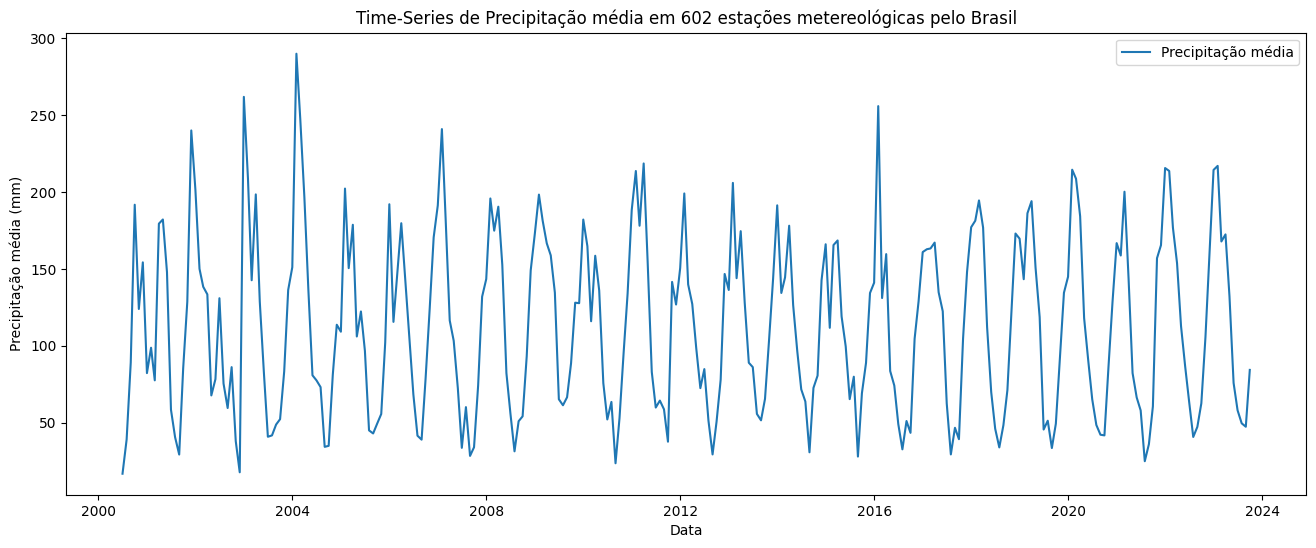

In [6]:
# Importing required libraries
import pandas as pd
import matplotlib.pyplot as plt

aggregated_dataframe['Data Medicao'] = pd.to_datetime(aggregated_dataframe['Data Medicao'], errors='coerce')
aggregated_dataframe.sort_index(inplace=True)

# time sereis agrupado por Data Medicao
time_series_data = aggregated_dataframe.groupby('Data Medicao')['PRECIPITACAO TOTAL, MENSAL (AUT)(mm)'].mean()


# Plot the time-series
plt.figure(figsize=(16, 6))
plt.plot(time_series_data.index, time_series_data.values, label='Precipitação média')
plt.title('Time-Series de Precipitação média em 602 estações metereológicas pelo Brasil')
plt.xlabel('Data')
plt.ylabel('Precipitação média (mm)')
plt.legend()
plt.show()

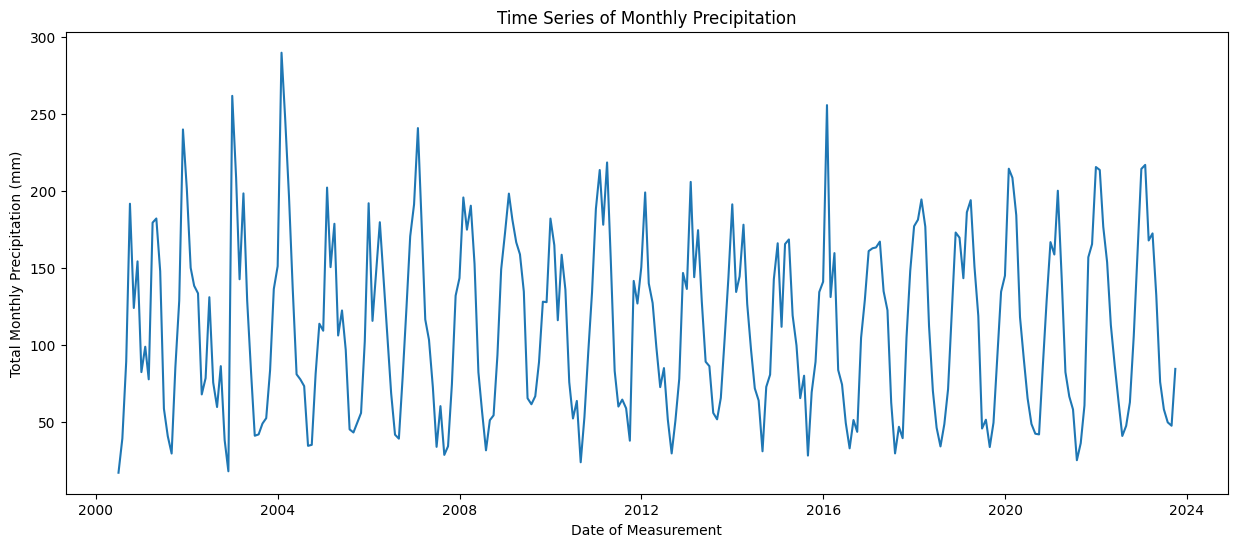

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

df = aggregated_dataframe

# Convert 'Data Medicao' to a datetime object for better manipulation and plotting
df['Data Medicao'] = pd.to_datetime(aggregated_dataframe['Data Medicao'], format='%Y-%m-%d', errors='coerce' )

# Plotting the time series of precipitation
plt.figure(figsize=(15, 6))
sns.lineplot(data=df, x='Data Medicao', y='PRECIPITACAO TOTAL, MENSAL (AUT)(mm)', errorbar=None)
plt.title('Time Series of Monthly Precipitation')
plt.xlabel('Date of Measurement')
plt.ylabel('Total Monthly Precipitation (mm)')
plt.show()

In [8]:
# Check if the data is uniformly distributed across stations and time periods.
# For this, we need more information about the station IDs and time periods, which is not available in the current dataset.
# However, we can look at the range of dates available in the data.
date_range = df['Data Medicao'].min(), df['Data Medicao'].max()

date_range

(Timestamp('2000-06-30 00:00:00'), Timestamp('2023-09-30 00:00:00'))

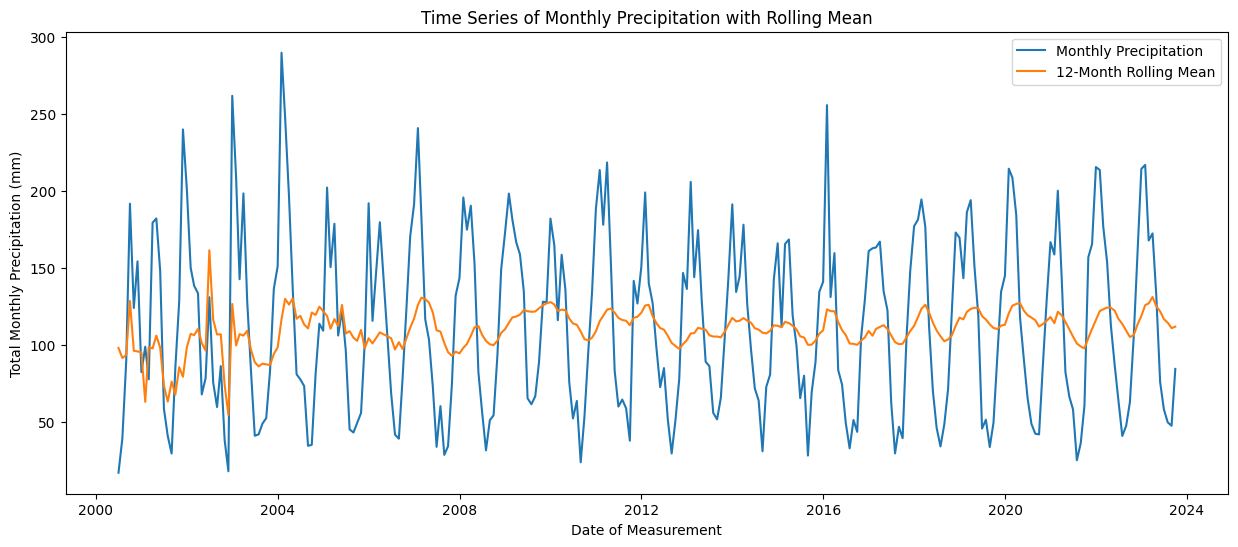

In [9]:
# Since the dataset provided only contains country-wide data (no station information),
# we can proceed directly to trend and seasonal analysis.

# For trend analysis, we can use a rolling mean to smooth out short-term fluctuations and highlight longer-term trends.
df['Rolling_Mean'] = df['PRECIPITACAO TOTAL, MENSAL (AUT)(mm)'].rolling(window=12).mean()

# Plotting the original time series along with the rolling mean for trend analysis
plt.figure(figsize=(15, 6))
sns.lineplot(data=df, x='Data Medicao', y='PRECIPITACAO TOTAL, MENSAL (AUT)(mm)', label='Monthly Precipitation', errorbar=None)
sns.lineplot(data=df, x='Data Medicao', y='Rolling_Mean', label='12-Month Rolling Mean', errorbar=None)
plt.title('Time Series of Monthly Precipitation with Rolling Mean')
plt.xlabel('Date of Measurement')
plt.ylabel('Total Monthly Precipitation (mm)')
plt.legend()
plt.show()

In [10]:
# Aggregate using mean for each duplicated timestamp
df_aggregated = df.groupby('Data Medicao').mean()
df_aggregated

<ipython-input-10-cd01d538398c>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_aggregated = df.groupby('Data Medicao').mean()


,"PRECIPITACAO TOTAL, MENSAL (AUT)(mm)",Rolling_Mean
Data Medicao,,
2000-06-30,16.866667,98.027778
2000-07-31,39.133333,91.494444
2000-08-31,89.200000,93.400000
2000-09-30,191.800000,128.600000
2000-10-31,124.000000,96.166667
...,...,...
2023-05-31,75.893299,121.800687
2023-06-30,58.108163,116.818027
2023-07-31,49.640196,114.396691


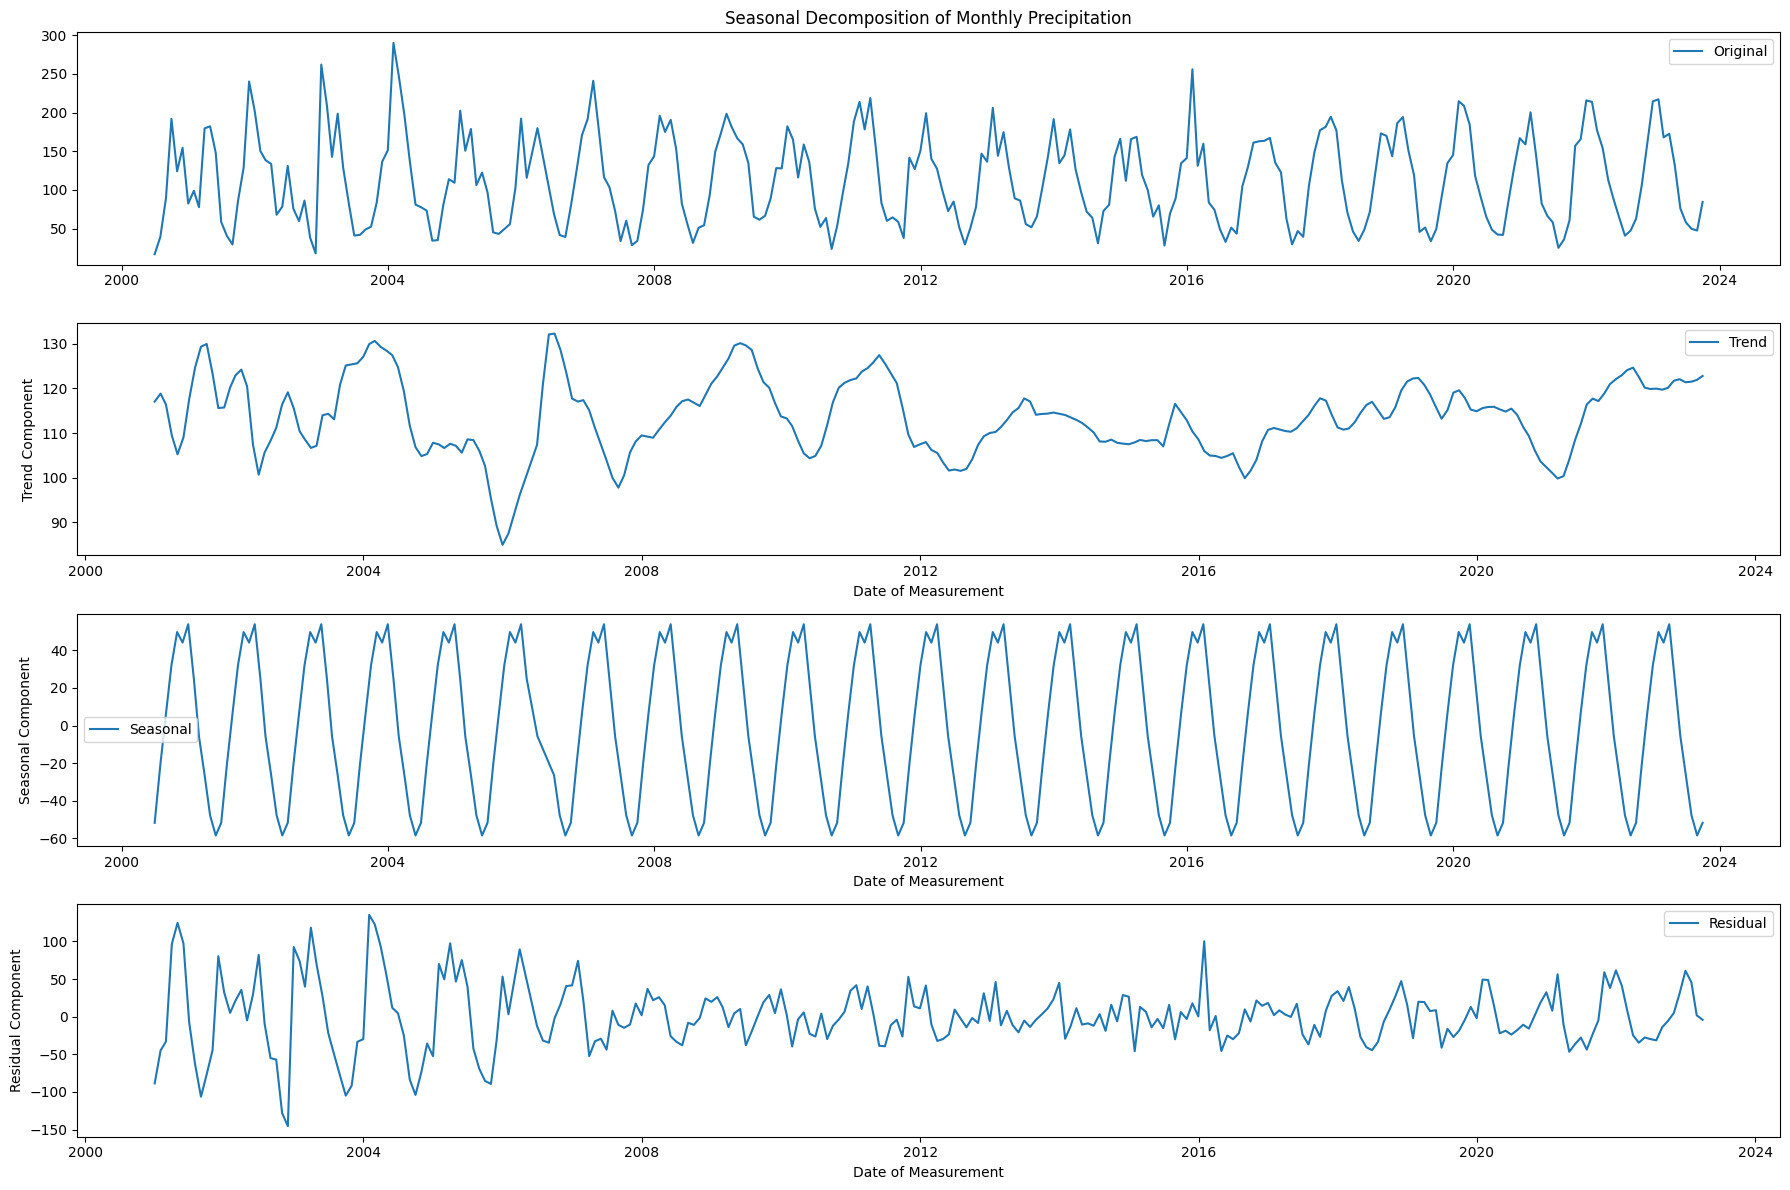

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform seasonal decomposition
decomposition = seasonal_decompose(df_aggregated['PRECIPITACAO TOTAL, MENSAL (AUT)(mm)'], period=12)

# Plot the decomposed components
plt.figure(figsize=(18, 12))

plt.subplot(4, 1, 1)
plt.plot(decomposition.observed, label='Original')
plt.legend(loc='best')
plt.title('Seasonal Decomposition of Monthly Precipitation')

plt.subplot(4, 1, 2)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='best')
plt.xlabel('Date of Measurement')
plt.ylabel('Trend Component')

plt.subplot(4, 1, 3)
plt.plot(decomposition.seasonal, label='Seasonal')
plt.legend(loc='best')
plt.xlabel('Date of Measurement')
plt.ylabel('Seasonal Component')

plt.subplot(4, 1, 4)
plt.plot(decomposition.resid, label='Residual')
plt.legend(loc='best')
plt.xlabel('Date of Measurement')
plt.ylabel('Residual Component')

plt.tight_layout()
plt.show()

### **Tendência (Trend)**
Imagina que você está jogando um jogo de vídeo game que dura várias horas. A "tendência" seria como se você estivesse olhando para o seu desempenho geral durante todo o jogo. Se você está coletando mais pontos ou moedas à medida que o tempo passa, isso é uma "tendência de alta". Se você está perdendo, é uma "tendência de baixa". No nosso caso de chuvas, uma "tendência" diria se, ao longo dos anos, está chovendo mais ou menos. No nosso caso, a tendência não mostrou nada forte para cima ou para baixo. Isso quer dizer que a quantidade de chuva tem sido mais ou menos estável ao longo dos anos.

### **Sazonal (Seasonal)**
Sabe como no Natal sempre tem panetone e no Carnaval sempre tem confete e serpentina? Isso é algo "sazonal", que acontece numa certa época do ano. No caso da chuva, "sazonal" quer dizer que tem meses que costumam ser mais chuvosos e outros que são mais secos. É como se a chuva tivesse sua própria "época de panetone", entende?

### **Residual (Resíduo)**
Agora, imagina que você está assistindo a um filme e percebe alguns detalhes que não fazem sentido, como um personagem que aparece do nada ou um objeto que muda de lugar sozinho. Esses são os "resíduos" do filme, coisas que não conseguimos explicar direito. No nosso gráfico de chuvas, "residual" é aquela parte que não conseguimos explicar nem pela "tendência" nem pelo que é "sazonal". São como "ruídos de fundo" que não têm um padrão claro.

In [17]:
df_aggregated

,"PRECIPITACAO TOTAL, MENSAL (AUT)(mm)",Rolling_Mean
Data Medicao,,
2000-06-30,16.866667,98.027778
2000-07-31,39.133333,91.494444
2000-08-31,89.200000,93.400000
2000-09-30,191.800000,128.600000
2000-10-31,124.000000,96.166667
...,...,...
2023-05-31,75.893299,121.800687
2023-06-30,58.108163,116.818027
2023-07-31,49.640196,114.396691


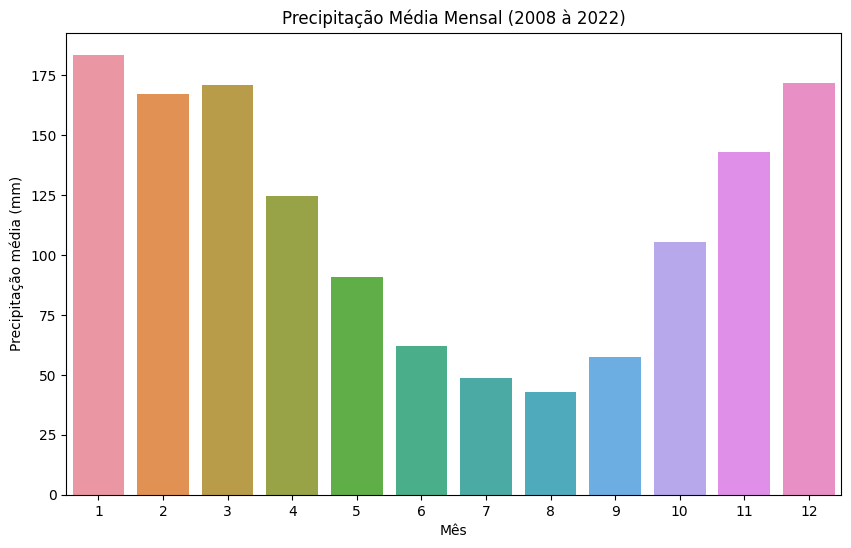

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns


# Check for duplicate timestamps and aggregate them by taking the mean
df_aggregated = df_aggregated.groupby('Data Medicao').mean().reset_index()

# Extract the month from the datetime index
df_aggregated['Month'] = df_aggregated['Data Medicao'].dt.month

# filter
df_aggregated = df_aggregated[df_aggregated['Data Medicao'].dt.year.between(2008, 2022)]


# Group by month and calculate mean precipitation
seasonal_analysis = df_aggregated.groupby('Month')['PRECIPITACAO TOTAL, MENSAL (AUT)(mm)'].mean().reset_index()

# Plotting the seasonal trends
plt.figure(figsize=(10, 6))
sns.barplot(data=seasonal_analysis, x='Month', y='PRECIPITACAO TOTAL, MENSAL (AUT)(mm)', errorbar=None)
plt.title('Precipitação Média Mensal (2008 à 2022)')
plt.xlabel('Mês')
plt.ylabel('Precipitação média (mm)')
plt.show()

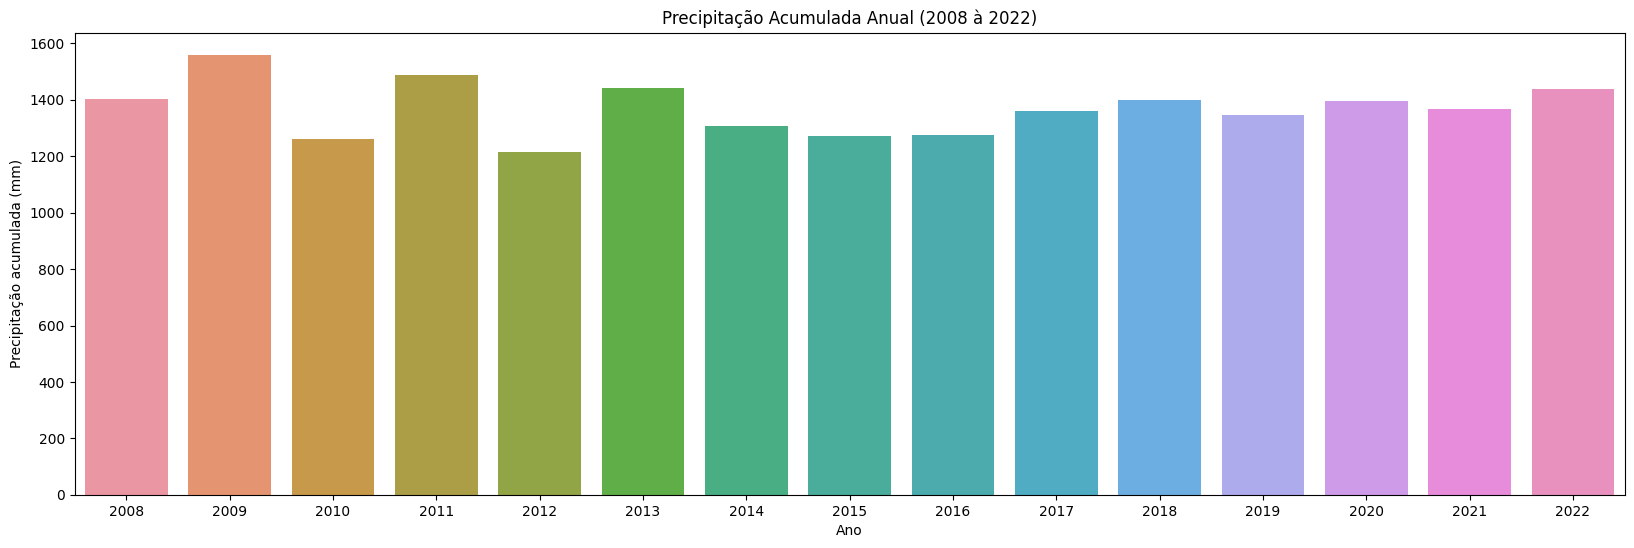

In [30]:
# Extract the month from the datetime index
df_aggregated['Year'] = df_aggregated['Data Medicao'].dt.year

# Group by month and calculate mean precipitation
seasonal_analysis_year = df_aggregated.groupby('Year')['PRECIPITACAO TOTAL, MENSAL (AUT)(mm)'].sum().reset_index()

# Plotting the seasonal trends
plt.figure(figsize=(20, 6))
sns.barplot(data=seasonal_analysis_year, x='Year', y='PRECIPITACAO TOTAL, MENSAL (AUT)(mm)', errorbar=None)
plt.title('Precipitação Acumulada Anual (2008 à 2022)')
plt.xlabel('Ano')
plt.ylabel('Precipitação acumulada (mm)')
plt.show()
